In [2]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import geopandas as gp

In [7]:
#paths
top = "../data/surfaces_geoter_decoup/TOPO (inf 0 en mer).asc"
surfQ  = "../data/surfaces_geoter_decoup/Mur QUAT.asc"
surfPC = "../data/surfaces_geoter_decoup/Mur PC.asc"
surfPMS = "../data/surfaces_geoter_decoup/Mur PMS.asc"

surf = [top,surfQ,surfPC,surfPMS]

In [8]:
# retrieve name of the files
surffile=[]
for file in surf:
    surffile.append(file.split("/")[-1].split(".")[0])

In [9]:
shp = "../data/shp/limit_model/limiteModeleRoussillon_poly_offshore_vHydro.shp"

# boundary of the domain
x_c=[];y_c=[]
for x,y in zip(gp.read_file(shp).geometry.boundary[0].xy[0],gp.read_file(shp).geometry.boundary[0].xy[1]):
    x_c.append(x)
    y_c.append(y)

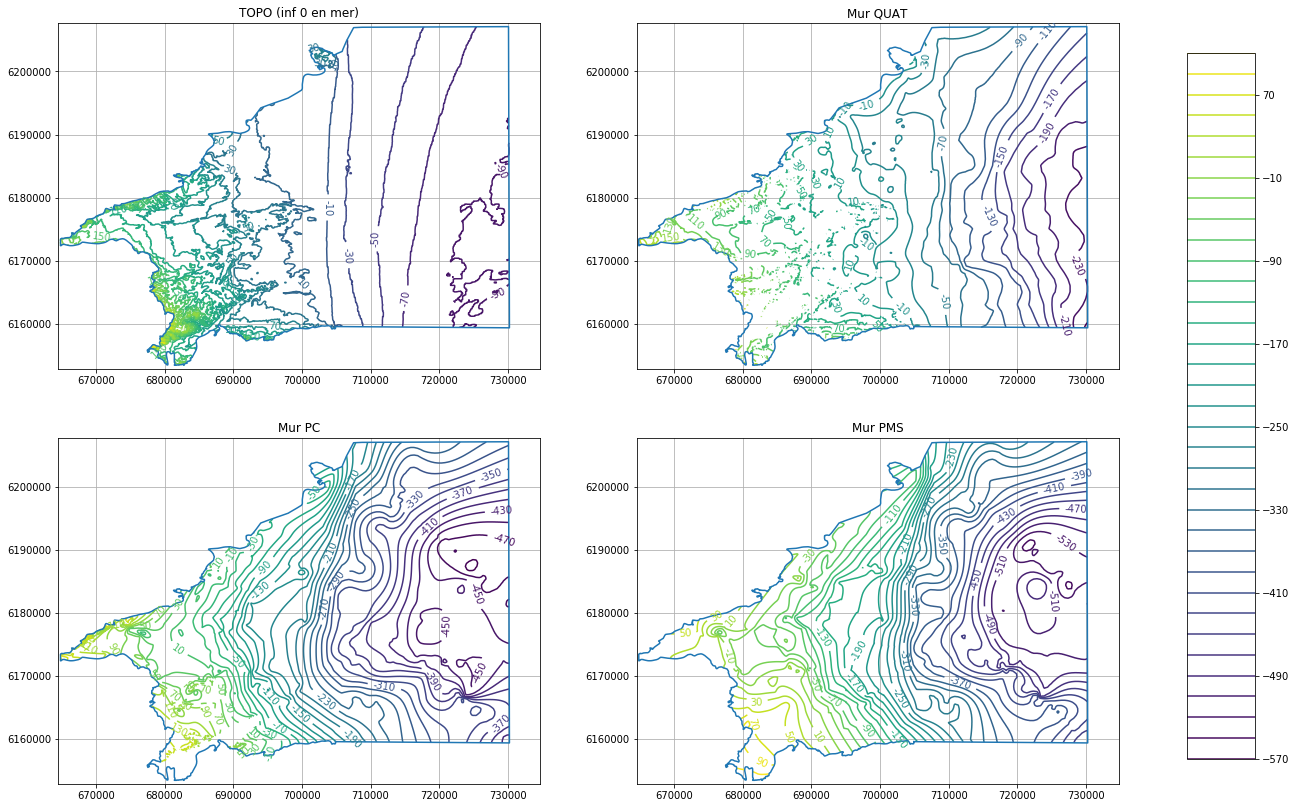

In [13]:
fig = plt.figure(figsize=(19,14))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i,sur in enumerate(surf):
    i = int(i)
    r=rasterio.open(sur)
    x0,x1,y0,y1 = r.bounds
    
    arr = r.read()[0]
    arr[arr>1000]=None
    
    ax = fig.add_subplot(2,2,i+1)
    vmin = np.round(np.nanmin(arr),decimals=-1)
    vmax = np.round(np.nanmax(arr),decimals=-1)
    plt.plot(x_c,y_c)
    cont = ax.contour(np.flipud(arr),extent=[x0,y0,x1,y1],levels=np.arange(vmin,vmax,20))
    plt.clabel(cont,fmt="%1i")
    
    plt.grid()
    plt.title(surffile[i])
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(cont,cax=cbar_ax)

<Figure size 1296x864 with 0 Axes>

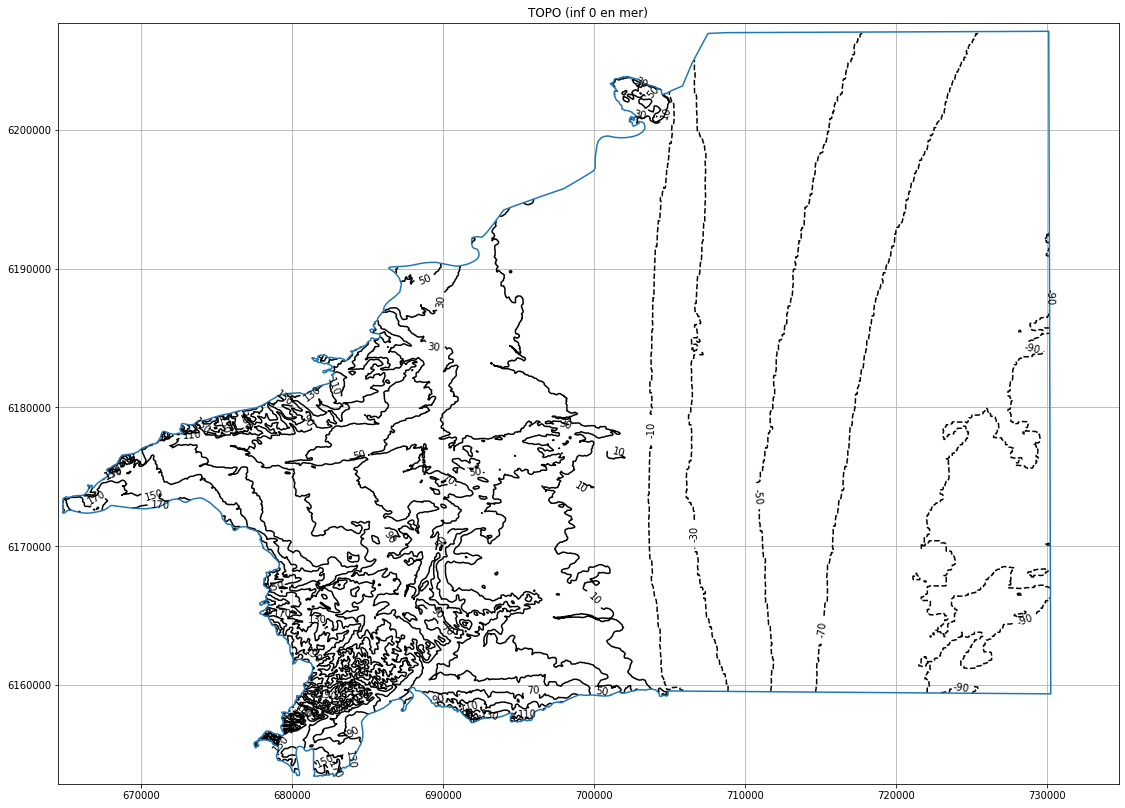

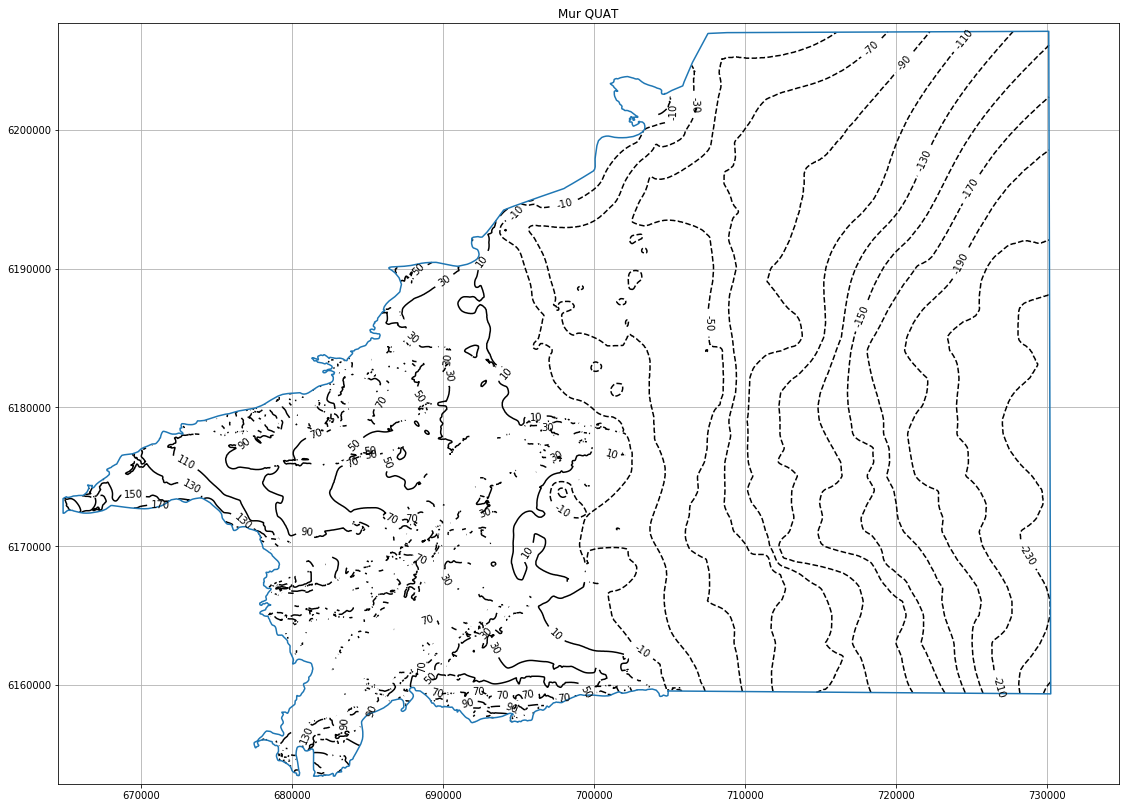

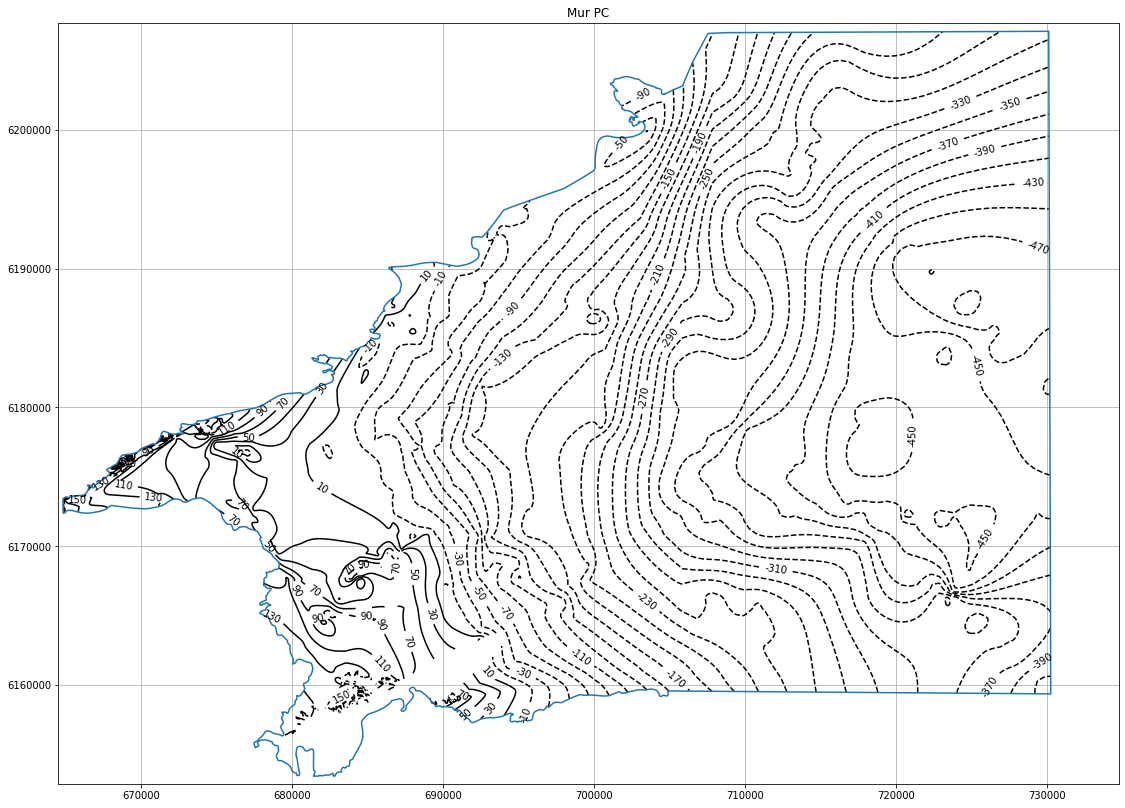

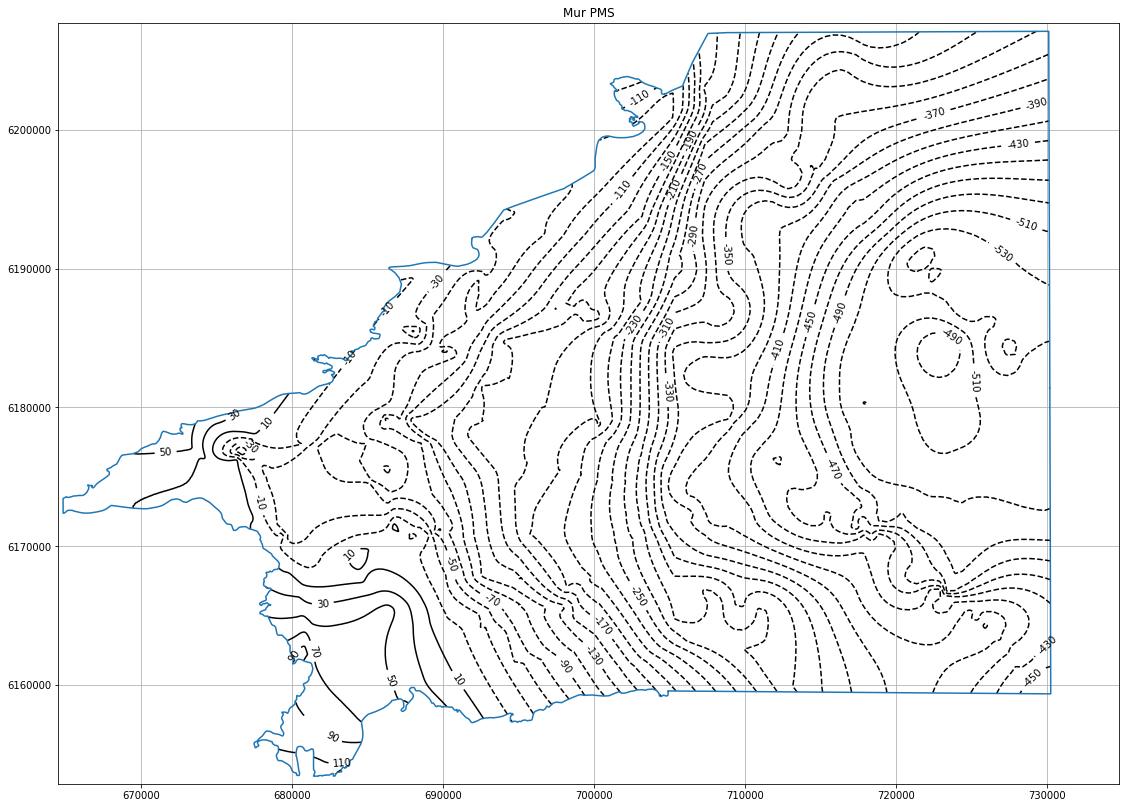

In [22]:
fig = plt.figure(figsize=(18,12))

for i,sur in enumerate(surf):
    fig = plt.figure(figsize=(19,14))
    i = int(i)
    r=rasterio.open(sur)
    x0,x1,y0,y1 = r.bounds
    
    arr = r.read()[0]
    arr[arr>1000]=None
    
    vmin = np.round(np.nanmin(arr),decimals=-1)
    vmax = np.round(np.nanmax(arr),decimals=-1)
    plt.plot(x_c,y_c)
    
    
    cont = plt.contour(np.flipud(arr),extent=[x0,y0,x1,y1],levels=np.arange(vmin,vmax,20),colors="k")
    plt.clabel(cont,fmt="%1i")
    
    plt.grid()
    plt.title(surffile[i])
    plt.savefig("{}".format(surffile[i]))
    plt.show();